예제 7.6 convolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
h = np.array([1,1,1,1,1]) #np.ones(5)
x = np.array([1,2,4])
y = np.convolve(x,h) #convolution

print(y)

z = np.convolve([1,0,0], h) + 2*np.convolve([0,1,0], h) + 4*np.convolve([0,0,1], h)
print(z)

print(np.convolve([1,0,0], h), 2*np.convolve([0,1,0], h), 4*np.convolve([0,0,1], h))

[1 3 7 7 7 6 4]
[1 3 7 7 7 6 4]
[1 1 1 1 1 0 0] [0 2 2 2 2 2 0] [0 0 4 4 4 4 4]


<StemContainer object of 3 artists>

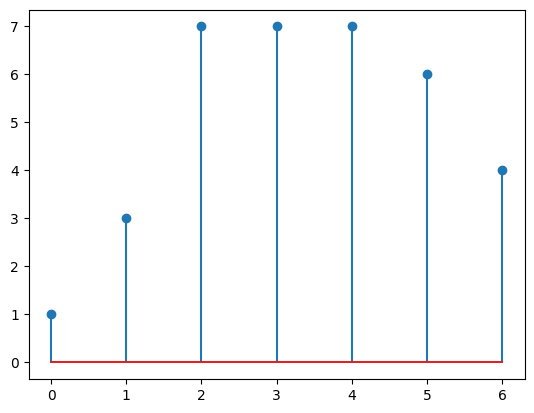

In [ ]:
plt.stem(z)

예제 7.9

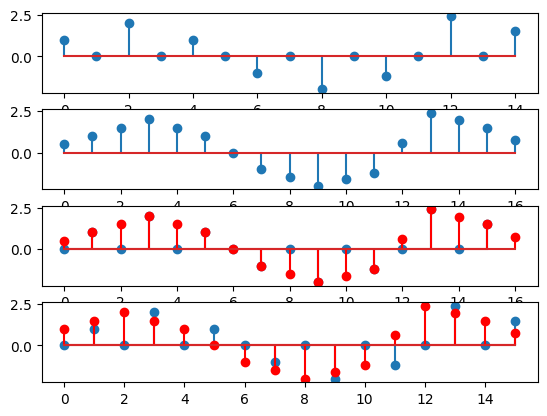

In [ ]:
h = np.array([0.5,1,0.5])
x = np.array([1,0,2,0,1,0,-1,0,-2,0,-1.2,0,2.4,0,1.5])
fig, ax = plt.subplots(4,1)

ax[0].stem(x)
y = np.convolve(x, h); ax[1].stem(y)
ax[2].stem(np.convolve([0,1],x)); ax[2].stem(y,'r');
ax[3].stem(np.convolve([0,1],x)); ax[3].stem(y[1:],'r');

그림 7 26
오염된 정현신호의 IIR필터링

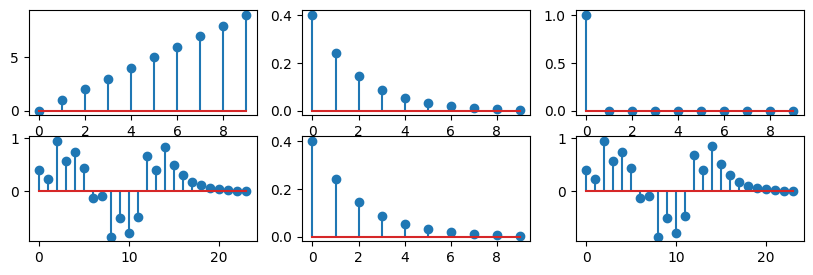

In [ ]:
N = 10; n = np.arange(N); h = 0.4*(0.6)**n;
x = np.array([1,0,2,0,1,0,-1,0,-2,0,-1.2,0,2.4,0,1.5])
fig, ax = plt.subplots(2,3, figsize=(10,3)); imp = np.zeros(N); imp[0] = 1;
ax[0,0].stem(n);ax[0,1].stem(n,h); ax[0,2].stem(imp);

a = [1,-0.6]; b = [0.4,0]; h2 = signal.lfilter(b, a, imp); #signal.lfilter(b,a,imp);
ax[1,1].stem(h2);
ax[1,0].stem(np.convolve(x, h));
ax[1,2].stem(signal.lfilter(b,a,np.concatenate((x,np.zeros(N-1)))));
#np.concatenance는 np.concat과 다르게 명시적으로 범위를 지정해야함 그리고 concat은 인자를 하나의 리스트로 바꿔서 합침

**5단 이동평균기**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

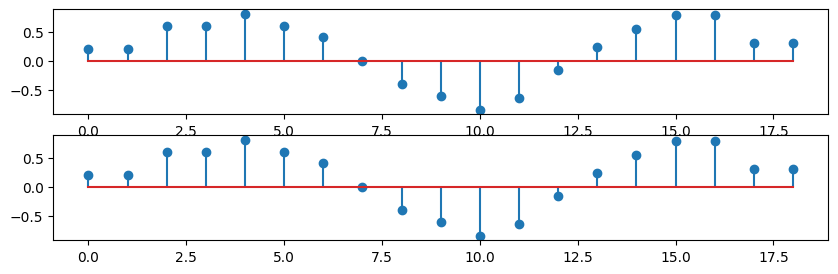

In [ ]:
x = np.array([1,0,2,0,1,0,-1,0,-2,0,-1.2,0,2.4,0,1.5])
#FIR
h = 1/5 * np.array([1,1,1,1,1])
moving_avg = np.convolve(x, h)

#y[n] = y[n-1] = 0.2x[n] - 0.2x[n-5]
N = 5; h = np.ones(N)/N;
a = [1,-1]; b = np.array([1,0,0,0,0,-1])/N;


fig, ax = plt.subplots(2,1, figsize = (10,3))
ax[0].stem(moving_avg)
ax[1].stem(signal.lfilter(b,a,np.concatenate((x,np.zeros(N-1)))));

In [ ]:
zi = signal.lfilter(b, a, [2,3]) #y[-1] = 2, y[-2] = 3
y,zf = signal.lfilter(b, a, x, zi=zi) #(초기값이 있는 경우)